In [1]:
cd("C:\\Dropbox\\Health and Labour Supply\\Model\\Dynamic Economics 28-29 October 2013\\final code\\v5_julia")

# Load all functions, solve and simulate it
require("main_v5.jl")


Let's check inputs...!
Inputs are fine :)
Income Grid Done
Passed period 50 of 50
Passed period 49 of 50
Passed period 48 of 50
Passed period 47 of 50
Passed period 46 of 50
Passed period 45 of 50
Passed period 44 of 50
Passed period 43 of 50
Passed period 42 of 50
Passed period 41 of 50
Passed period 40 of 50
Passed period 39 of 50
Passed period 38 of 50
Passed period 37 of 50
Passed period 36 of 50
Passed period 35 of 50
Passed period 34 of 50
Passed period 33 of 50
Passed period 32 of 50
Passed period 31 of 50
Passed period 30 of 50
Passed period 29 of 50
Passed period 28 of 50
Passed period 27 of 50
Passed period 26 of 50
Passed period 25 of 50
Passed period 24 of 50
Passed period 23 of 50
Passed period 22 of 50
Passed period 21 of 50
Passed period 20 of 50
Passed period 19 of 50
Passed period 18 of 50
Passed period 17 of 50
Passed period 16 of 50
Passed period 15 of 50
Passed period 14 of 50
Passed period 13 of 50
Passed period 12 of 50
Passed period 11 of 50
Passed period 10 of 5

# Plot Policy Functions

In [3]:
using Gadfly
using Interact        # Even nicer plots

plotNode1 = 3;
plotNodeLast = numPointsA; 

# A cool and interactive plot!!!
function policyFunc(t)    
    A=eExp([ Agrid[t][plotNode1:plotNodeLast] ],borrowCon[t],gridMethod) # Our A-grid is in 3-log steps, we need it back in levels    
    return A ,  policyC[t, plotNode1:plotNodeLast, 1] ,  policyC[t, plotNode1:plotNodeLast, numPointsY]
end

function valueF(t)
    A=eExp([ Agrid[t][plotNode1:plotNodeLast] ],borrowCon[t],gridMethod) # Our A-grid is in 3-log steps, we need it back in levels
    return A , val[t, plotNode1:plotNodeLast, 1] ,  val[t, plotNode1:plotNodeLast, numPointsY]
end

@manipulate for t=1:T , f=[policyFunc, valueF]
    (xi, y1, y2)=f(t)
    
    bsample = DataFrame(Val=vec(xi),LowInc=vec(y1),HighInc=vec(y2))
    bsample[:mtindex] = 1:size(bsample,1)     # Add an identifier
    datamia=stack(bsample,[2:3])              # Reshape the data so we can use colors!   
    plot(datamia,x="Val",y="value",color="variable",Geom.line,Guide.title("Policy Function"))
end

Slider{Int64}([Input{Int64}] 25,"t",25,1:50)

Options{:ToggleButtons,Function}([Input{Function}] policyFunc,"f",policyFunc,"policyFunc",["policyFunc"=>policyFunc,"valueF"=>valueF])

# Some Simulations

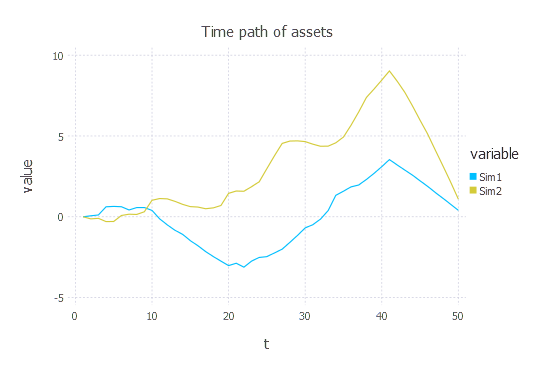

In [3]:
bsample = DataFrame(t=data1[:t],Sim1=data1F[ (data1F[:Indiv].==1) ,:A],Sim2=data1F[ (data1F[:Indiv].==2) , :A])
bsample[:mtindex] = 1:size(bsample,1)     # Add an identifier
datamia=stack(bsample,[2:3])              # Reshape the data so we can use colors!

plot(datamia,x="t",y="value",color="variable",Geom.line,Guide.title("Time path of assets"))

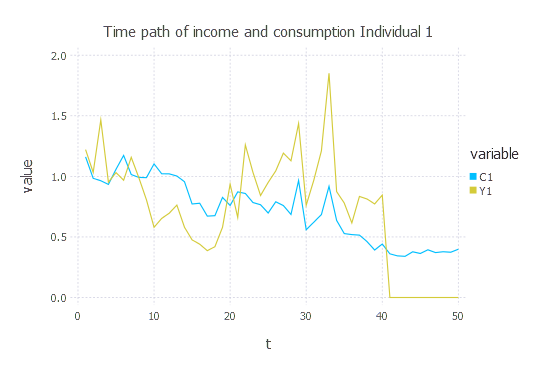

In [4]:
bsample = DataFrame(t=data1[:t],C1=data1F[ (data1F[:Indiv].==1) ,:C],Y1=data1F[ (data1F[:Indiv].==1) , :labY])
bsample[:mtindex] = 1:size(bsample,1)     # Add an identifier
datamia=stack(bsample,[2:3])              # Reshape the data so we can use colors!

plot(datamia,x="t",y="value",color="variable",Geom.line,Guide.title("Time path of income and consumption Individual 1"))

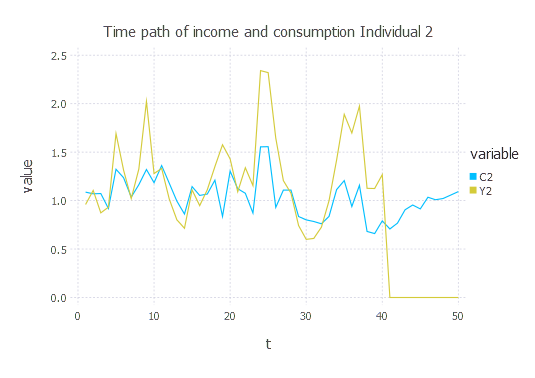

In [5]:
bsample = DataFrame(t=data1[:t],C2=data1F[ (data1F[:Indiv].==2) ,:C],Y2=data1F[ (data1F[:Indiv].==2) , :labY])
bsample[:mtindex] = 1:size(bsample,1)     # Add an identifier
datamia=stack(bsample,[2:3])              # Reshape the data so we can use colors!

plot(datamia,x="t",y="value",color="variable",Geom.line,Guide.title("Time path of income and consumption Individual 2"))